In [174]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import autocorrelation_plot
from pmdarima import auto_arima

In [175]:
df = pd.read_csv(r"D:\EOY Datasets\Full Datasets\Everything_cleaned.csv",index_col=0)

C:\Users\ellio\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [176]:
df = df.reset_index(drop=True)

In [177]:
df.head()

,Crime ID,Month,Reported by,Crime type,Outcome type,Year,Level_of_Lockdown,Region
0,e9a50727f2189e0c50f704e3661bc1a8ae3a39aece4866...,2019-01,Avon and Somerset,Violence and sexual offences,No suspect identified,2019,No Lockdown,South West
1,fb06f54e9d633a961109ef74171e4beb40b2fe44e57a10...,2019-01,Avon and Somerset,Violence and sexual offences,Unable to prosecute suspect,2019,No Lockdown,South West
2,4655ba031d5c8d00b247577a22472fbb8f9130d98b7d95...,2019-01,Avon and Somerset,Violence and sexual offences,No suspect identified,2019,No Lockdown,South West
3,2830f28a4a93138717182d1cc51b6d77cfaf3c27398934...,2019-01,Avon and Somerset,Theft offences,No suspect identified,2019,No Lockdown,South West
4,ca01d599d45f6e1d1bc5b05ddc6a1b559870fc831baa8e...,2019-01,Avon and Somerset,Theft offences,No suspect identified,2019,No Lockdown,South West


In [178]:
df['Crime type'].value_counts()

Violence and sexual offences    4553047
Theft offences                  2848076
Criminal damage and arson       1248556
Public order offences           1120457
Drug offences                    440597
Name: Crime type, dtype: int64

In [179]:
df.Month = pd.to_datetime(df['Month'], format='%Y-%m')

In [180]:
grouped = df.groupby(['Month','Crime type'])['Crime ID'].count()
grouped = grouped.reset_index().rename(columns={'Crime ID':'Count'})

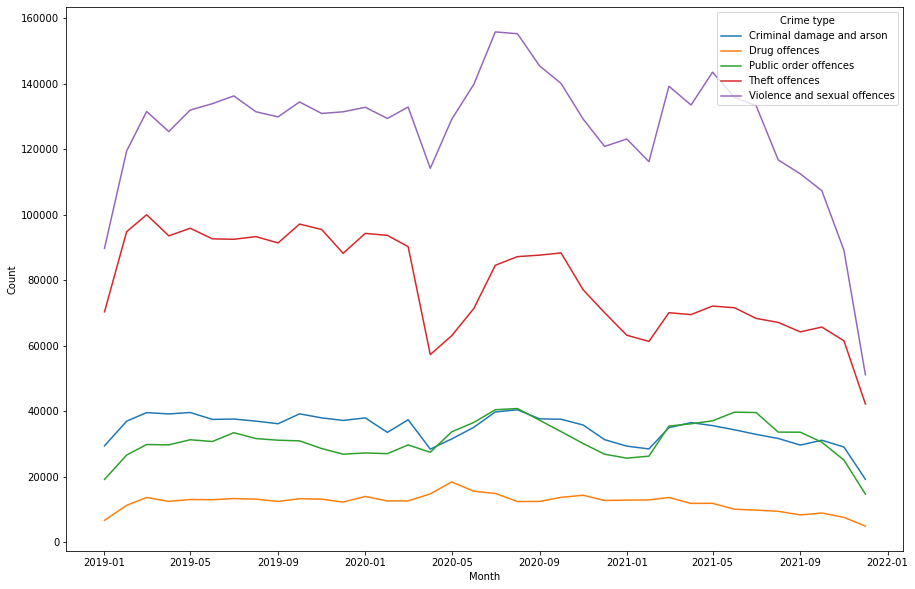

In [181]:
plt.figure(figsize=(15,10))
sns.lineplot(data=grouped,x='Month',y='Count', hue='Crime type')
plt.show()

In [182]:
grouped

,Month,Crime type,Count
0,2019-01-01,Criminal damage and arson,29489
1,2019-01-01,Drug offences,6748
2,2019-01-01,Public order offences,19242
3,2019-01-01,Theft offences,70373
4,2019-01-01,Violence and sexual offences,89782
...,...,...,...
175,2021-12-01,Criminal damage and arson,19252
176,2021-12-01,Drug offences,4987
177,2021-12-01,Public order offences,14742
178,2021-12-01,Theft offences,42251


<AxesSubplot:ylabel='Frequency'>

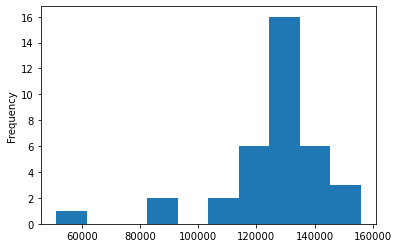

In [183]:
vio = grouped[grouped['Crime type']=='Violence and sexual offences']
vio = vio.set_index('Month')
vio = vio['Count']
vio_cut = vio[0:14]
vio.plot.hist()

In [184]:
from statsmodels.tsa.stattools import adfuller
adfuller(vio)[1]

0.910540140966113

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

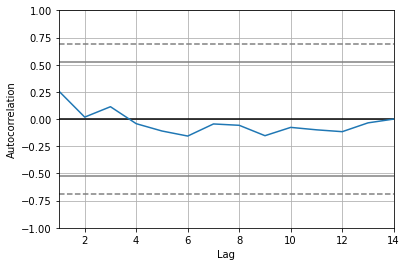

In [185]:
autocorrelation_plot(vio_cut)

In [186]:
train = vio_cut
train

Month
2019-01-01     89782
2019-02-01    119497
2019-03-01    131521
2019-04-01    125402
2019-05-01    131961
2019-06-01    133913
2019-07-01    136278
2019-08-01    131443
2019-09-01    129890
2019-10-01    134433
2019-11-01    130926
2019-12-01    131435
2020-01-01    132816
2020-02-01    129386
Name: Count, dtype: int64

In [199]:
stepwise_fit = auto_arima(train,trace=True,suppress_warnings=True,d=1)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=277.823, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=262.724, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=267.082, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=277.249, Time=0.00 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=264.770, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=270.864, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=264.827, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=260.682, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=262.663, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=268.489, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=265.387, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=262.436, Time=0.08 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.471 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   14
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -128.341
Date:                Sat, 11 Jun 2022   AIC                            260.682
Time:                        17:56:10   BIC                            261.812
Sample:                             0   HQIC                           260.449
                                 - 14                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3239      0.101      3.194      0.001       0.125       0.523
sigma2      2.191e+07   7.76e-10   2.82e+16      0.000    2.19e+07    2.19e+07
===================================================================================
Ljung-Box (L1) (Q):                   4.66   Jarque-Bera (JB):                 0.24
Prob(Q):                              0.03   Prob(JB):                         0.89
Heteroskedasticity (H):               0.24   Skew:                            -0.32
Prob(H) (two-sided):                  0.20   Kurtosis:                         2.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.1e+33. Standard errors may be unstable.
"""

In [200]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(1,1,0))
model_fit = model.fit()
yhat = model_fit.predict(len(train), len(train)+4) 
print(yhat)


2020-03-01    128274.907181
2020-04-01    127914.986699
2020-05-01    127798.396302
2020-06-01    127760.628735
2020-07-01    127748.394545
Freq: MS, Name: predicted_mean, dtype: float64


C:\Users\ellio\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ellio\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ellio\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


(array([18322., 18336., 18353., 18367., 18383., 18397., 18414., 18428.,
        18444.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

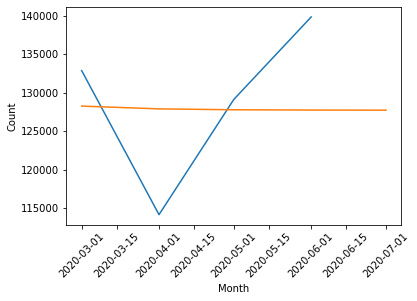

In [201]:
sns.lineplot(data=vio[14:18])
sns.lineplot(data=yhat)
plt.xticks(rotation = 45)

In [190]:
vio_normed = vio/67220000*10000
yhat_normed = yhat/67220000*10000

(array([18322., 18336., 18353., 18367., 18383., 18397., 18414., 18428.,
        18444.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

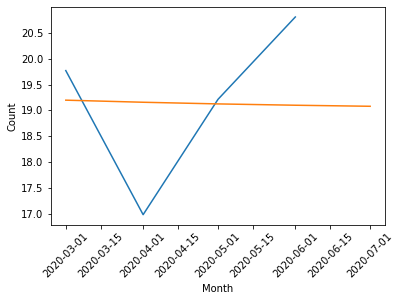

In [202]:
sns.lineplot(data=vio_normed[14:18])
sns.lineplot(data=yhat_normed)
plt.xticks(rotation = 45)

In [192]:
model = ARIMA(rolling_mean, order=(0,1,0))
model_fit = model.fit()
yhat2 = model_fit.predict(len(rolling_mean), len(rolling_mean)+4) 

C:\Users\ellio\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ellio\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ellio\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
